In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
# Load the Rotten Tomatoes dataset (adjust the filename if needed)
rt_df = pd.read_csv('RottenTomatoes/rotten_tomatoes_movies.csv')

# Display first few rows
rt_df.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [6]:
# Get basic info about the dataset
rt_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [7]:
# Check missing values percentage
missing_values = rt_df.isnull().sum() / len(rt_df) * 100
missing_values[missing_values > 0]


movie_info                 1.812331
critics_consensus         48.430443
genres                     0.107272
directors                  1.095303
authors                    8.705962
actors                     1.987353
original_release_date      6.583107
streaming_release_date     2.168022
runtime                    1.772809
production_company         2.817299
tomatometer_status         0.248419
tomatometer_rating         0.248419
tomatometer_count          0.248419
audience_status            2.529359
audience_rating            1.671183
audience_count             1.676829
dtype: float64

In [8]:
# Get statistics on numerical columns
rt_df.describe()


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [9]:
# Show unique values for categorical columns
categorical_cols = rt_df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"{col}: {rt_df[col].nunique()} unique values")


rotten_tomatoes_link: 17712 unique values
movie_title: 17106 unique values
movie_info: 17389 unique values
critics_consensus: 9132 unique values
content_rating: 6 unique values
genres: 1106 unique values
directors: 8933 unique values
authors: 12989 unique values
actors: 17330 unique values
original_release_date: 5804 unique values
streaming_release_date: 2271 unique values
production_company: 3046 unique values
tomatometer_status: 3 unique values
audience_status: 2 unique values


In [10]:
# Check for duplicate rows
duplicates = rt_df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")


Total duplicate rows: 0


In [11]:
# Show all column names
print(rt_df.columns)


Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')


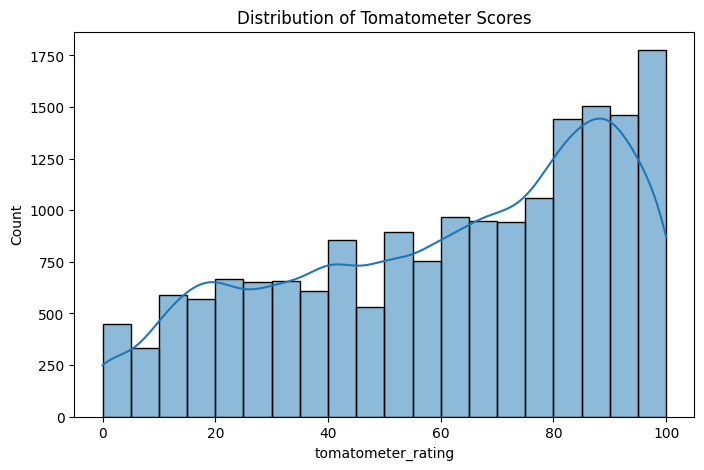

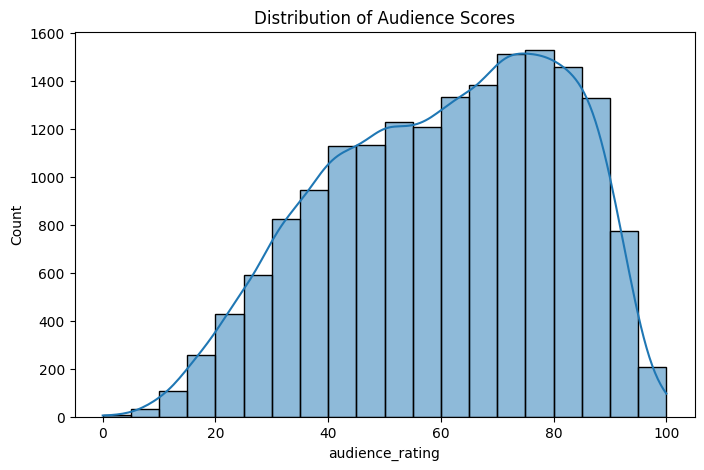

In [12]:
# Visualize Rotten Tomatoes Scores
plt.figure(figsize=(8,5))
sns.histplot(rt_df['tomatometer_rating'], bins=20, kde=True)
plt.title("Distribution of Tomatometer Scores")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(rt_df['audience_rating'], bins=20, kde=True)
plt.title("Distribution of Audience Scores")
plt.show()


In [13]:
# Create an explicit copy to avoid SettingWithCopyWarning
rt_df_cleaned = rt_df[[
    "movie_title", "genres",
    "tomatometer_rating", "tomatometer_count",
    "audience_rating", "audience_count",
    "tomatometer_fresh_critics_count", "tomatometer_rotten_critics_count"
]].copy()


In [14]:
# Convert columns to numeric safely
rt_df_cleaned.loc[:, "tomatometer_rating"] = pd.to_numeric(rt_df_cleaned["tomatometer_rating"], errors="coerce")
rt_df_cleaned.loc[:, "audience_rating"] = pd.to_numeric(rt_df_cleaned["audience_rating"], errors="coerce")
rt_df_cleaned.loc[:, "tomatometer_count"] = pd.to_numeric(rt_df_cleaned["tomatometer_count"], errors="coerce").fillna(0).astype(int)
rt_df_cleaned.loc[:, "audience_count"] = pd.to_numeric(rt_df_cleaned["audience_count"], errors="coerce").fillna(0).astype(int)

rt_df_cleaned["tomatometer_rating"] = rt_df_cleaned["tomatometer_rating"].fillna(rt_df_cleaned["tomatometer_rating"].median())
rt_df_cleaned["audience_rating"] = rt_df_cleaned["audience_rating"].fillna(rt_df_cleaned["audience_rating"].median())

# Fill missing genres
rt_df_cleaned["genres"] = rt_df_cleaned["genres"].fillna("Unknown")

In [15]:
# Ensure 'genres' column is a string and split by ", "
rt_df_cleaned["genres"] = rt_df_cleaned["genres"].astype(str).str.split(", ")

# Flatten the genre lists into a single list
all_genres = [genre for sublist in rt_df_cleaned["genres"] for genre in sublist]

# Count unique genres
unique_genres = set(all_genres)
print(f"Total Unique Genres: {len(unique_genres)}")
print(f"Genres: {unique_genres}")


Total Unique Genres: 22
Genres: {'Faith & Spirituality', 'Special Interest', 'Drama', 'Cult Movies', 'Horror', 'Anime & Manga', 'Animation', 'Romance', 'Musical & Performing Arts', 'Art House & International', 'Science Fiction & Fantasy', 'Action & Adventure', 'Gay & Lesbian', 'Western', 'Television', 'Classics', 'Documentary', 'Mystery & Suspense', 'Unknown', 'Comedy', 'Kids & Family', 'Sports & Fitness'}


In [21]:
# Ensure genres column is properly formatted as a list
rt_df["genres"] = rt_df["genres"].apply(lambda x: x if isinstance(x, list) else str(x).split(", ") if isinstance(x, str) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply one-hot encoding
genres_encoded = pd.DataFrame(mlb.fit_transform(rt_df["genres"]), columns=mlb.classes_)

# Merge back with the original dataset (excluding the original genres column)
rt_df_encoded = rt_df.drop(columns=["genres"]).join(genres_encoded)

print("✅ One-Hot Encoding applied to all 22 genres!")


✅ One-Hot Encoding applied to all 22 genres!


In [23]:
rt_df_encoded.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,directors,authors,actors,original_release_date,streaming_release_date,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,0,0,0,0,0,1,0,0,0,0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,0,0,0,0,0,0,0,0,0,0
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,0,0,0,0,1,0,0,0,0,0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,0,0,0,0,0,0,0,0,0,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,0,1,0,0,0,0,0,0,0,0


In [26]:
rt_df_encoded.to_csv("cleaned/rottentomatoMovies.csv", index=False)